In [ ]:
!nvidia-smi

Wed Jan 29 14:36:29 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# Install the ultralytics package from PyPI
!pip install ultralytics==8.2.103 -q
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.0/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:

!yolo checks

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.3/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.11
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

numpy               ✅ 1.26.4<2.0.0,>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.1.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu121>=1.8.0
torchvision         ✅ 0.20.1+cu121>=0.9.0
tqdm                ✅ 4.67.1>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.2.2>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0
ultralytics-thop    ✅ 2.0.14>=2.0.0
torch               ✅ 2.5.1+cu121!=2.4.0,>=1.8.0; sys_platform == "win32"


In [ ]:
!pip install roboflow==1.1.48 --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="TpotbuwE7LJINaw5huQl")
project = rf.workspace("deeplearning-s5bau").project("football-players-detection-qkg3c")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-2 in yolov8:: 100%|██████████| 794/794 [00:00<00:00, 4774.74it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/football-players-detection-2/data.yaml epochs=50 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 110MB/s] 
New https://pypi.org/project/ultralytics/8.3.69 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/football-players-detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cl

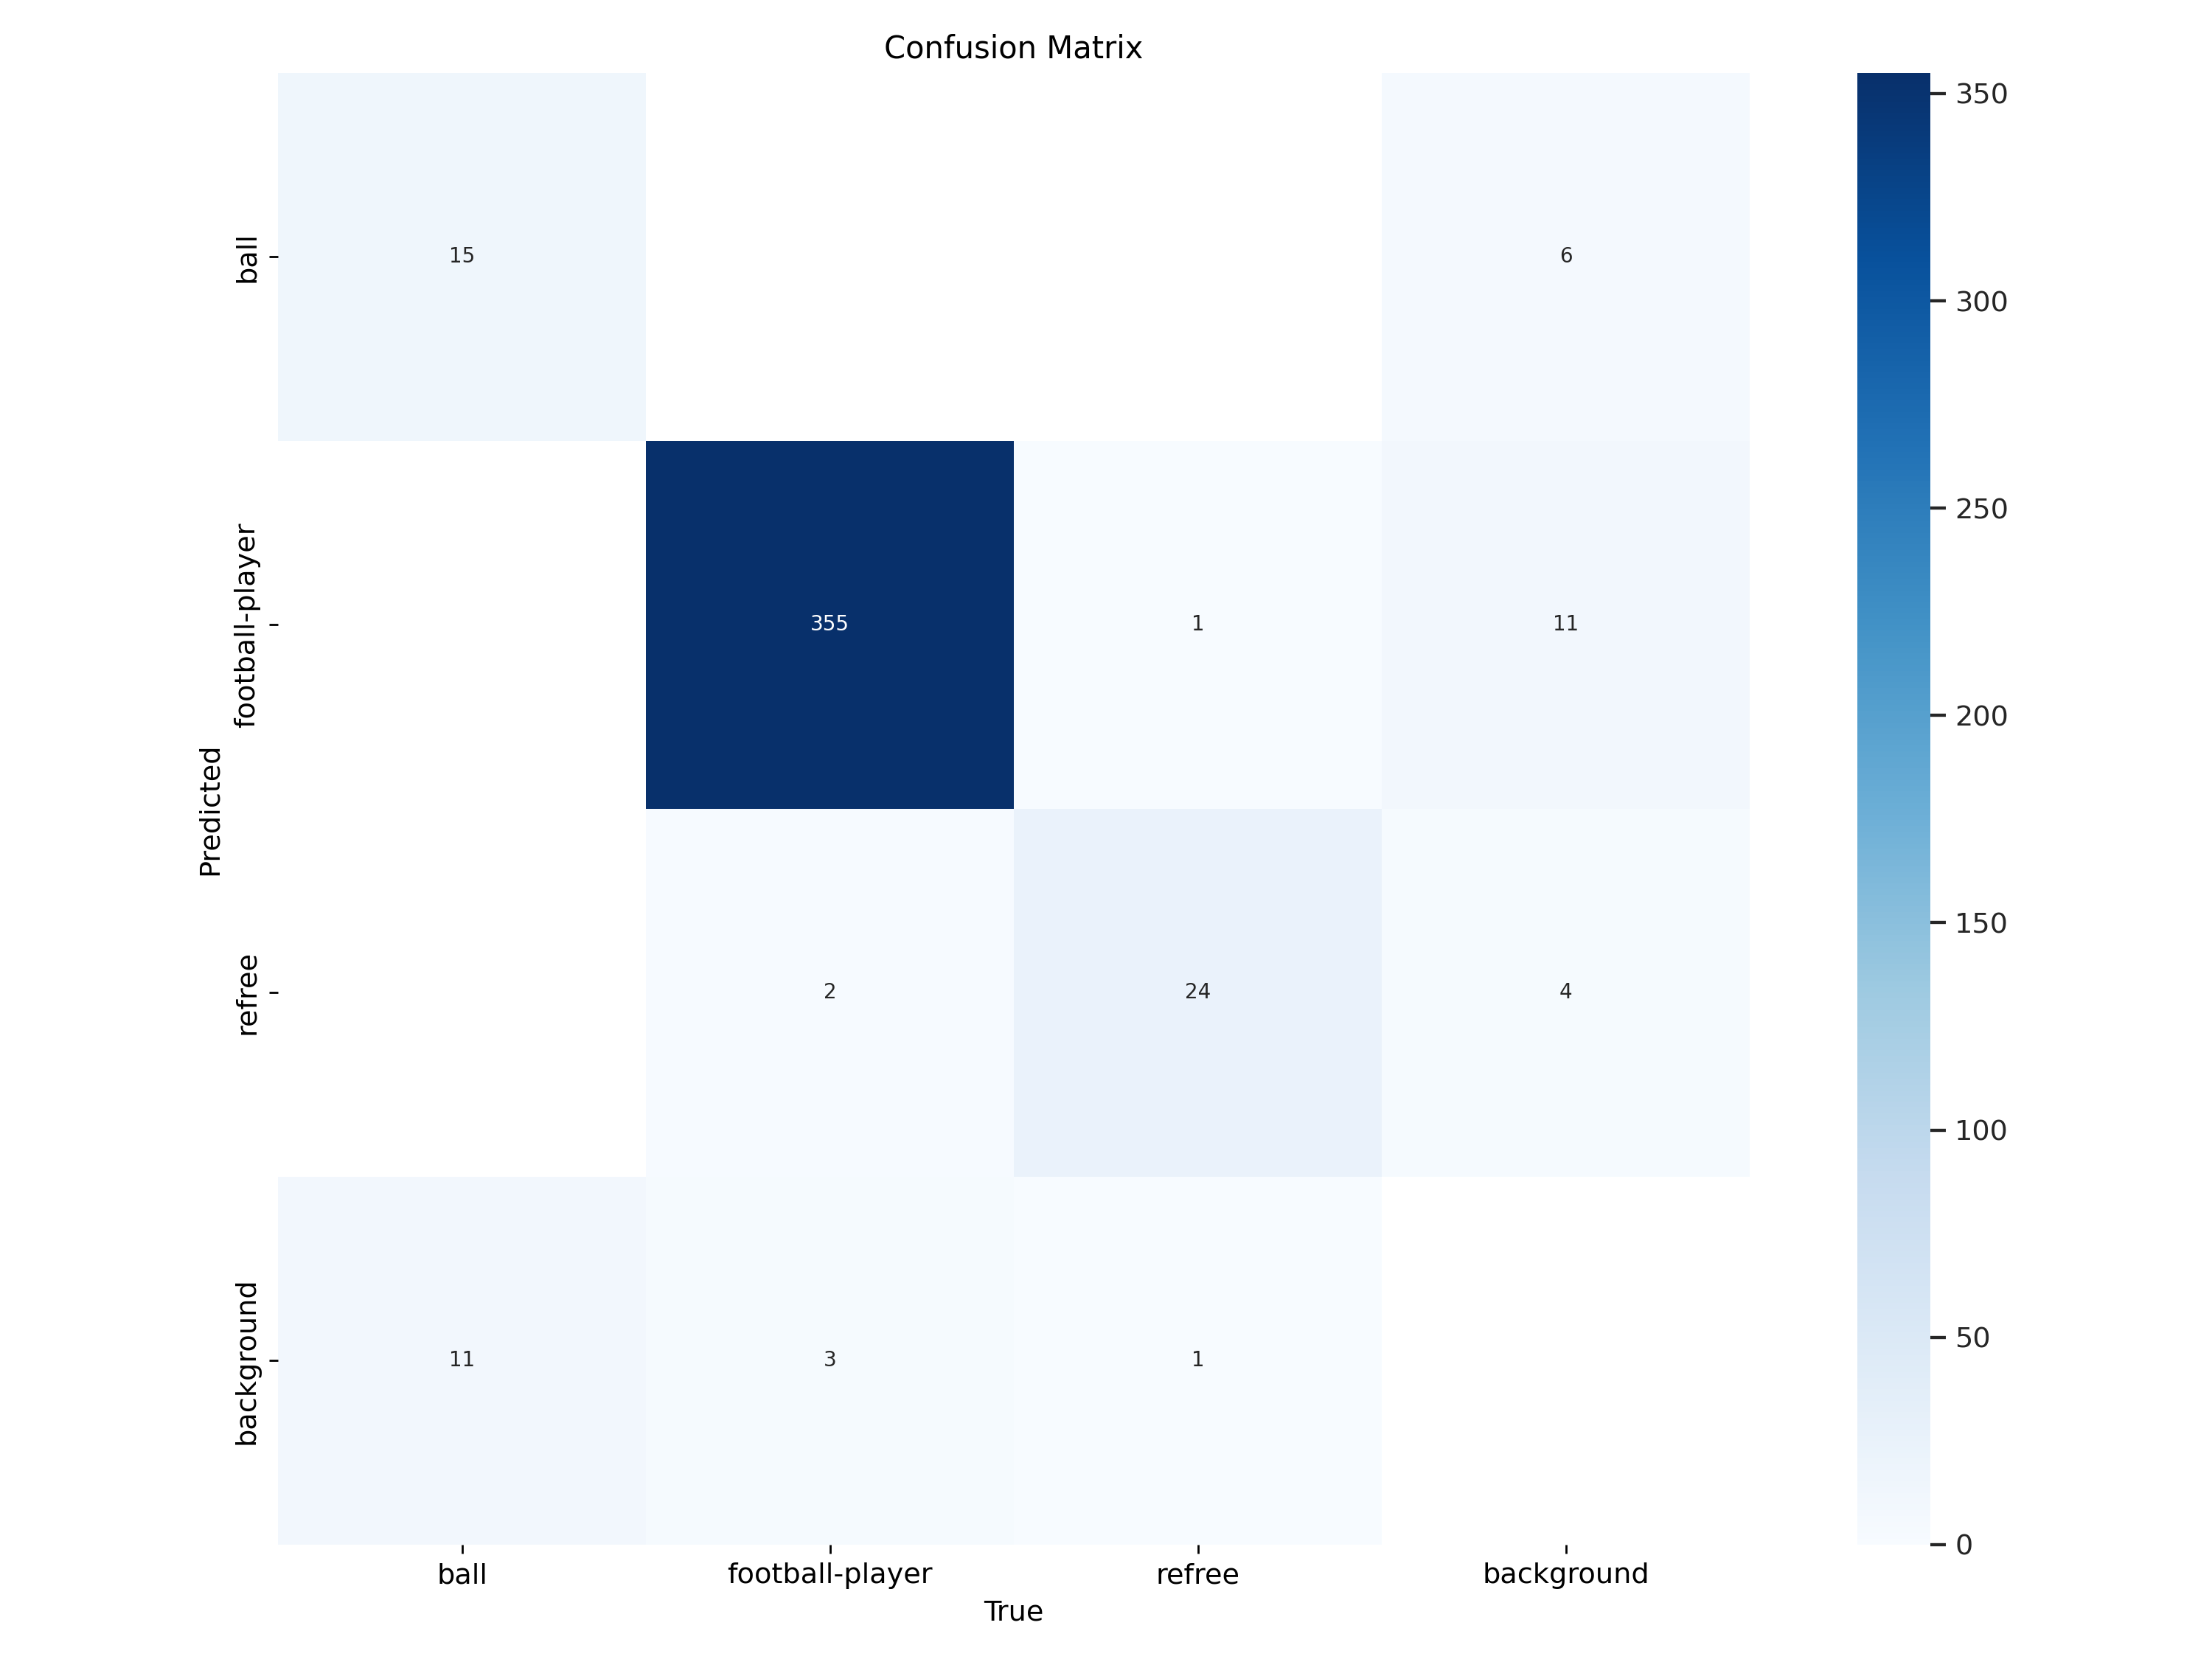

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

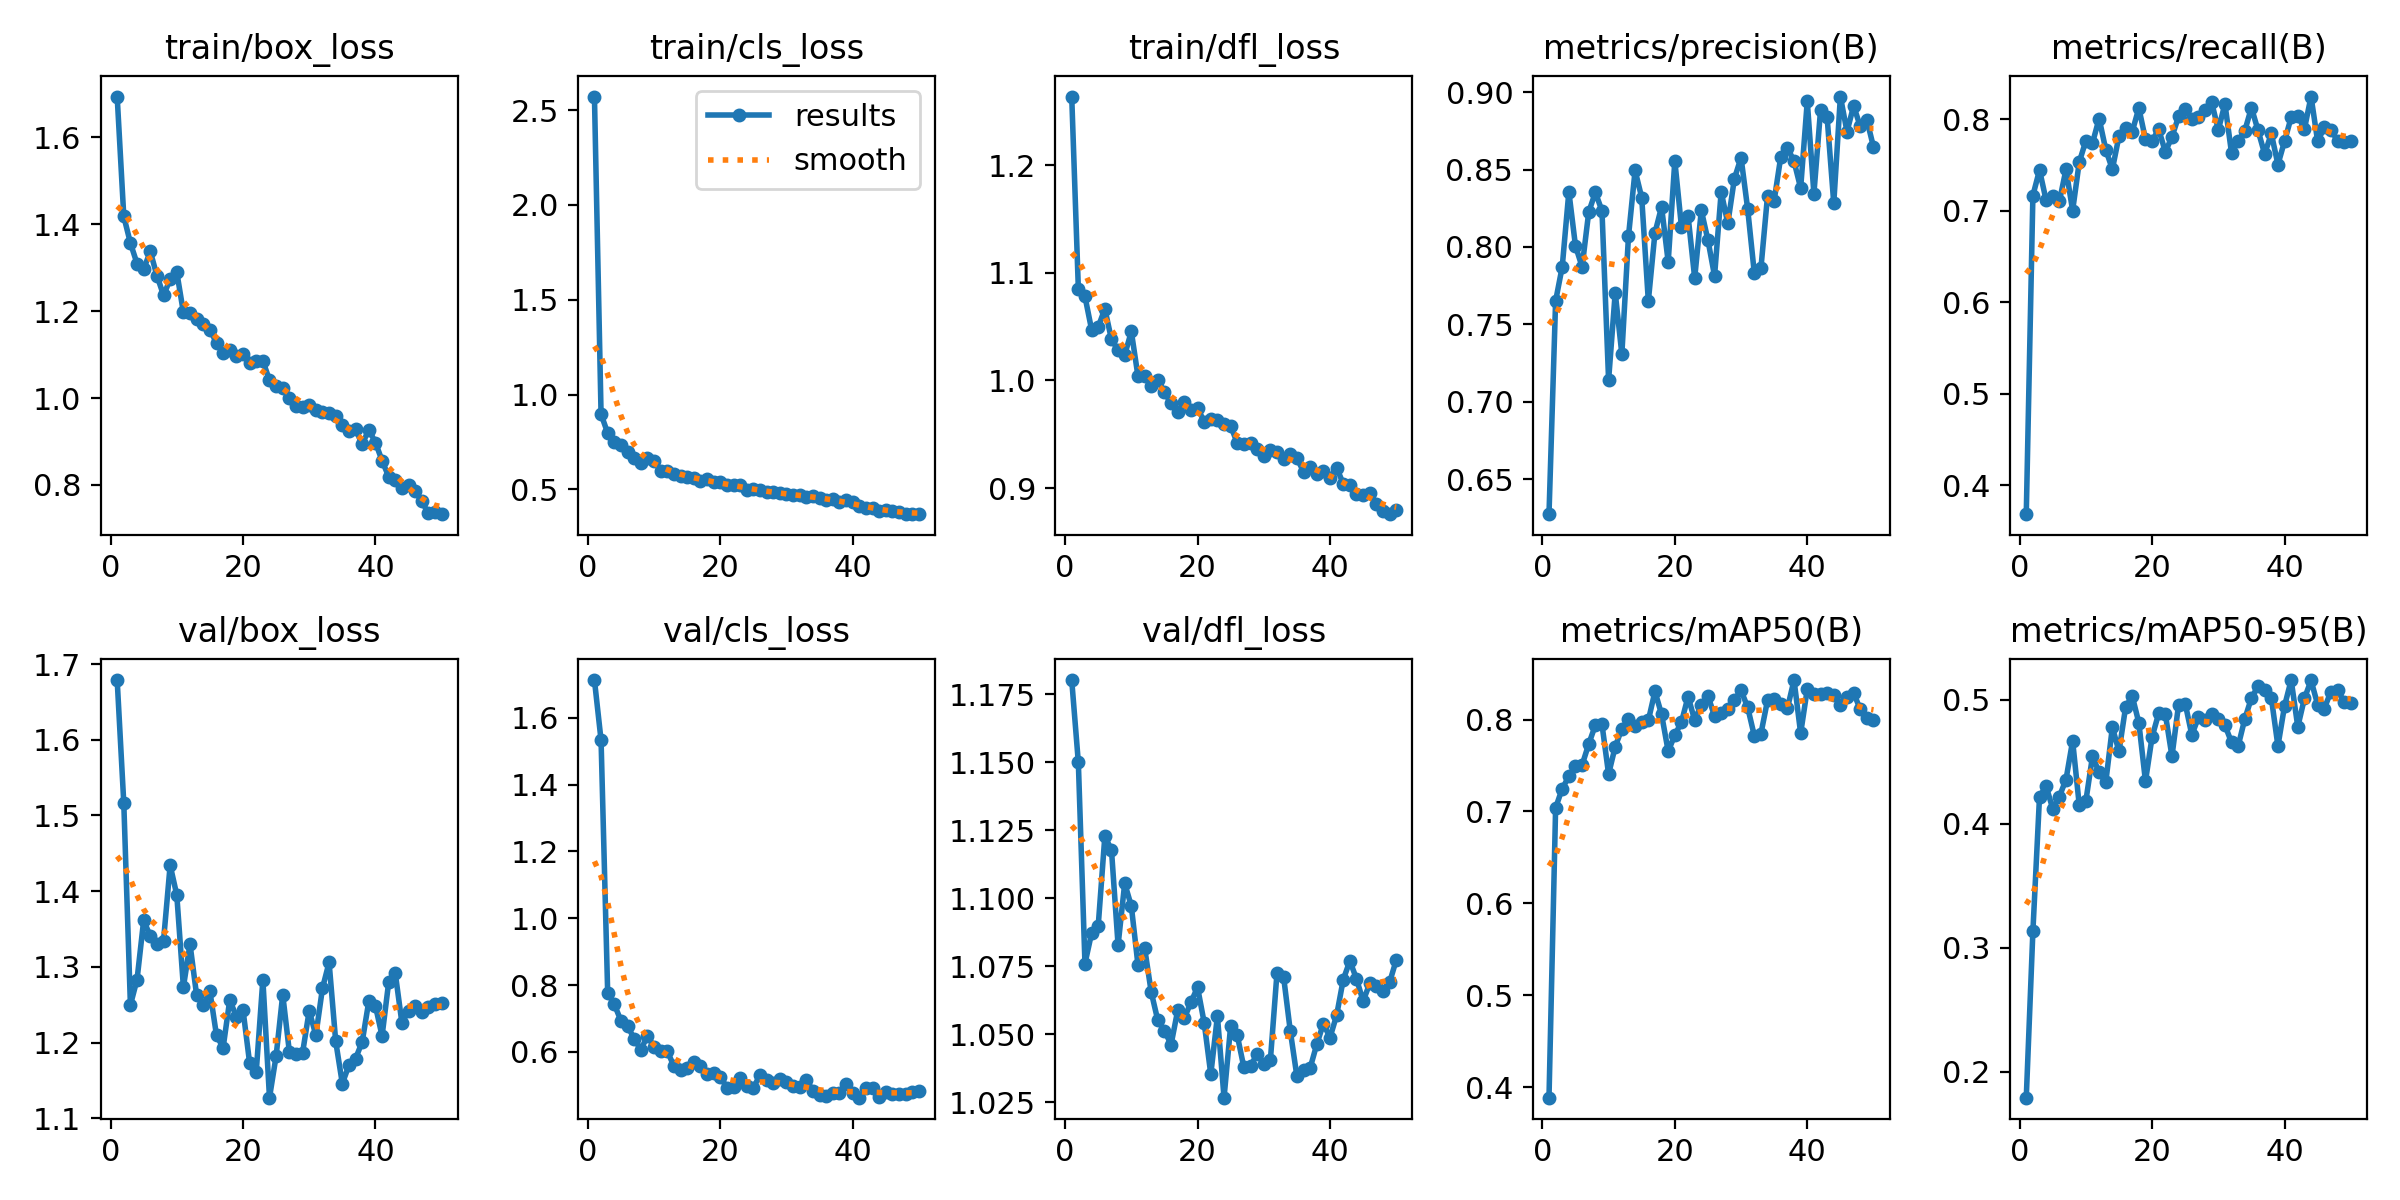

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=600)

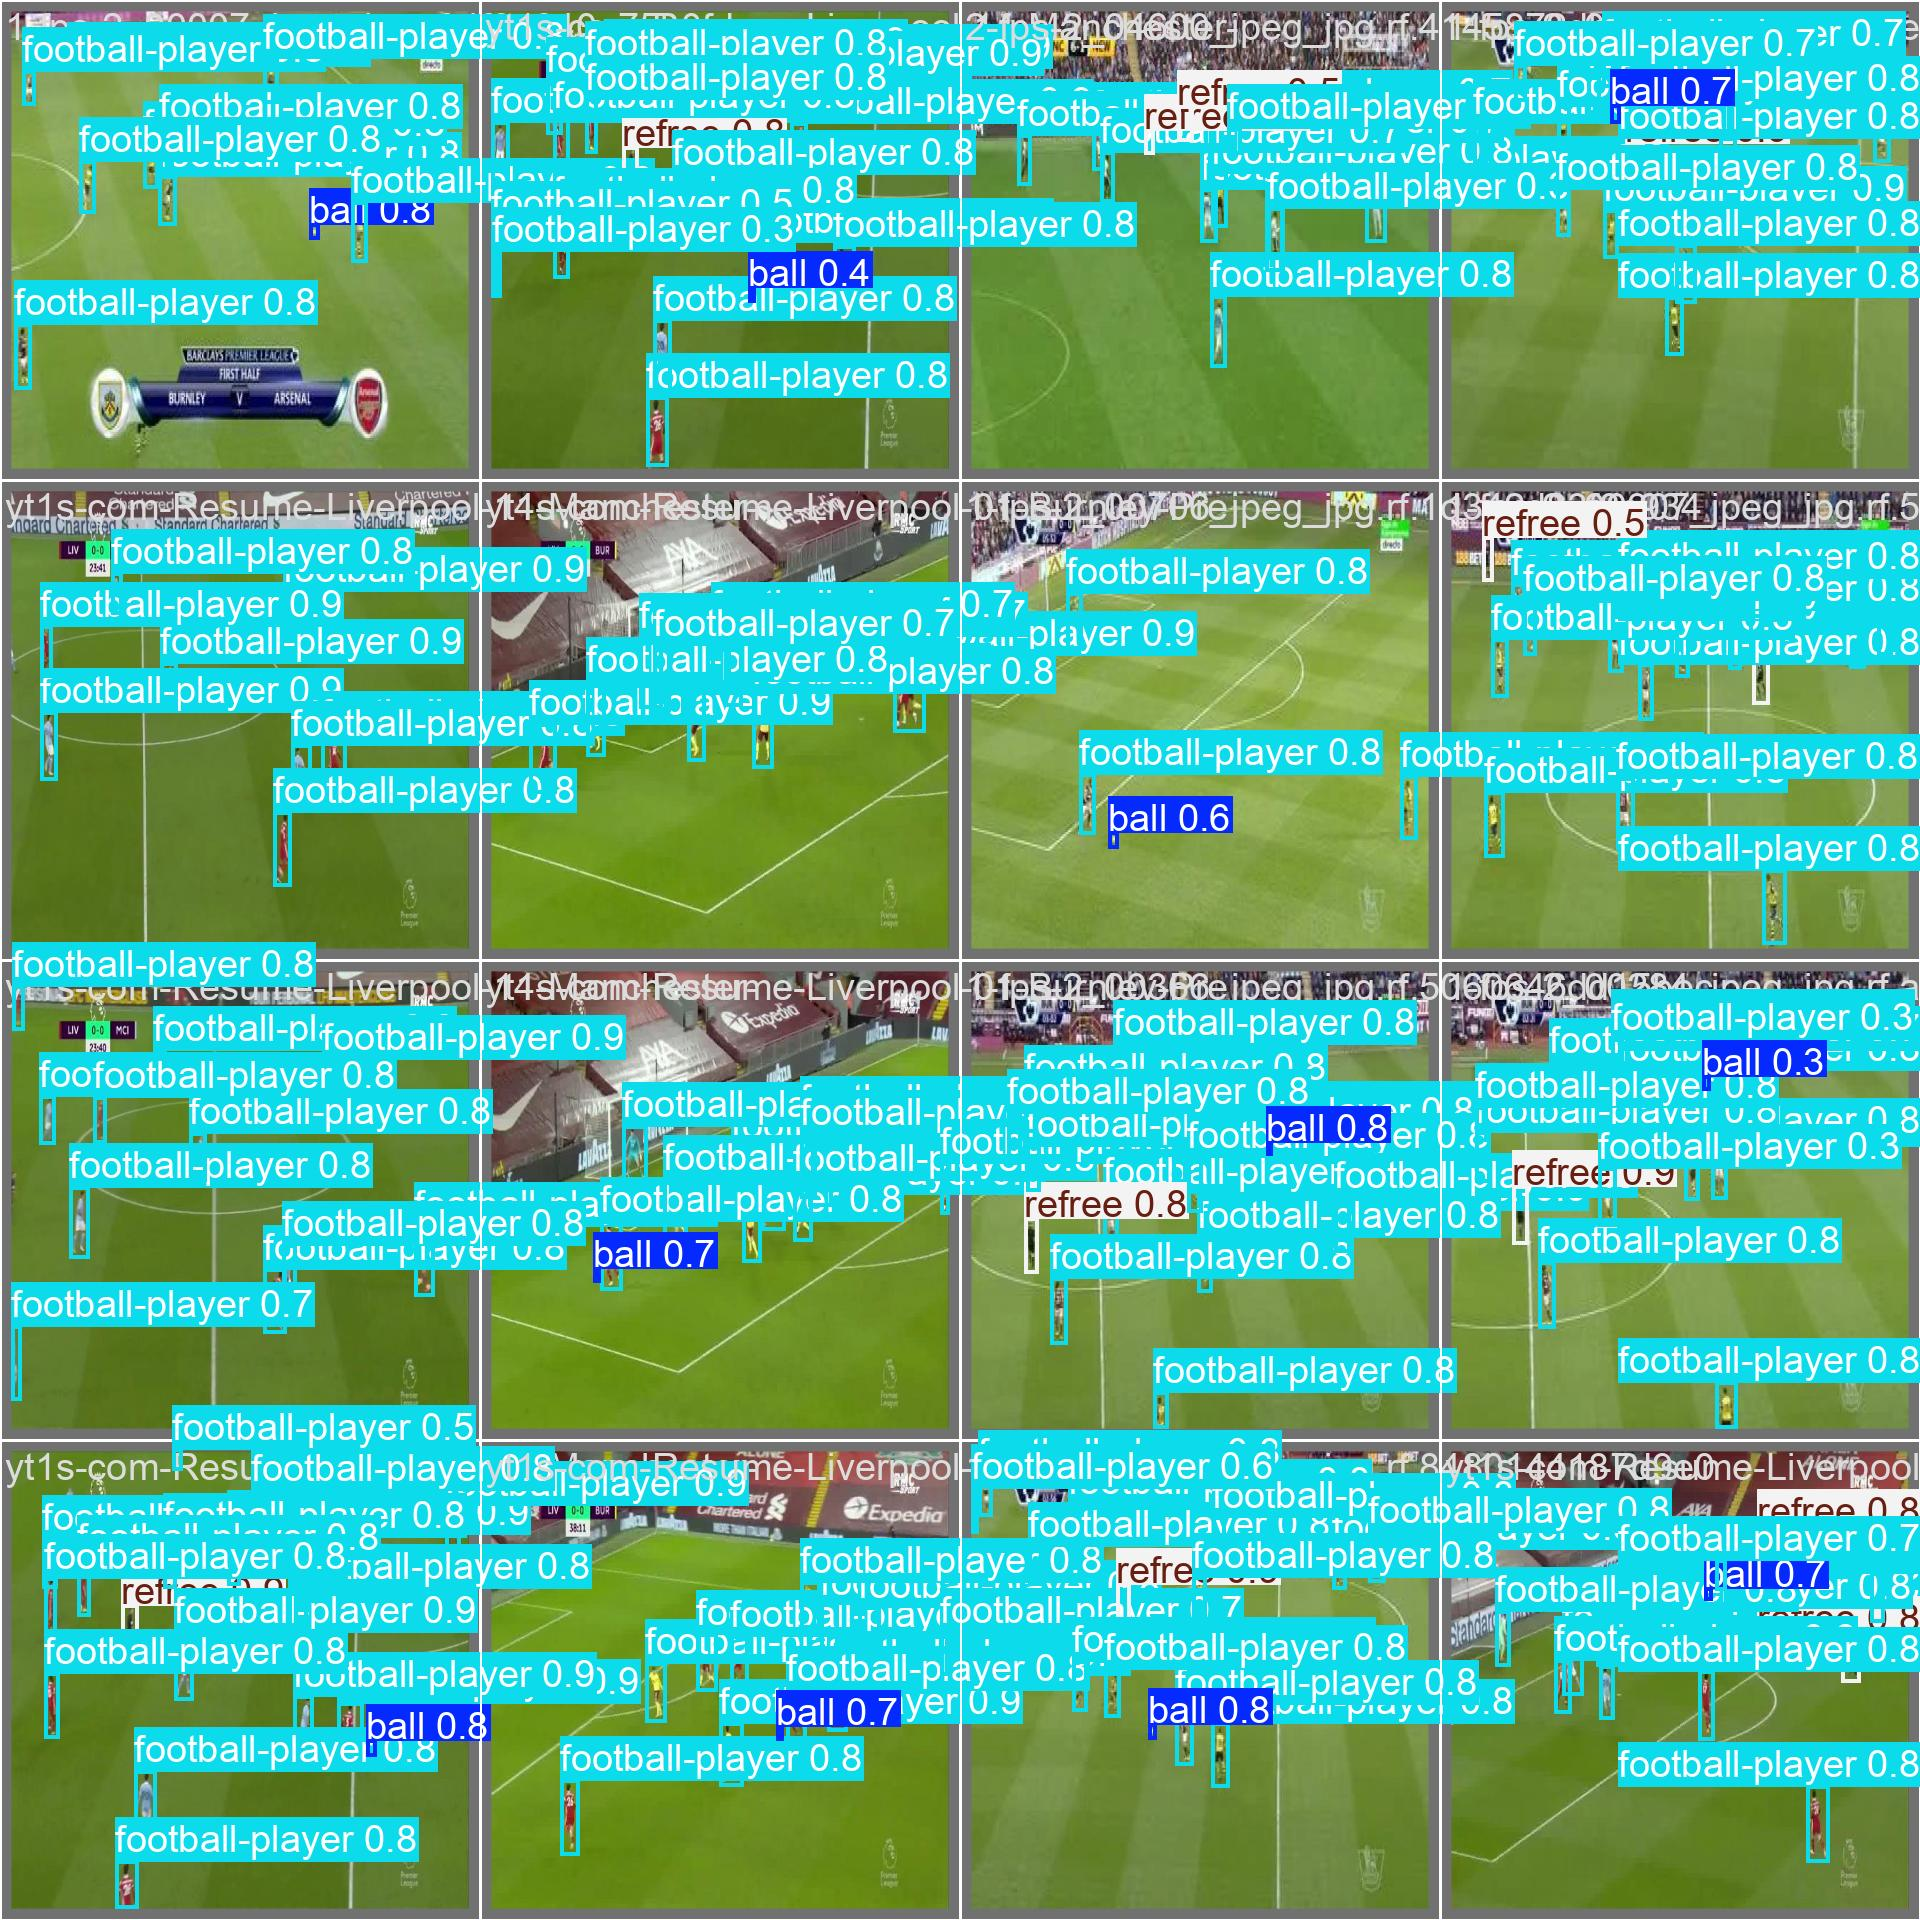

In [ ]:
Image(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/football-players-detection-2/data.yaml

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/football-players-detection-2/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.22it/s]
                   all         33        412      0.834      0.802      0.833      0.515
                  ball         26         26       0.69        0.5      0.545      0.235
       football-player         33        360      0.988      0.983      0.994      0.658
                refree         20         26      0.823      0.923      0.958      0.652
Speed: 0.2ms preprocess, 21.9ms inference, 0.0ms loss, 17.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/football-players-detection-2/test/images save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/16 /content/football-players-detection-2/test/images/1-fps-2_00001_jpeg_jpg.rf.0860d0272cf65d86c078cf7759ce95bc.jpg: 640x640 20 football-players, 3 refrees, 16.2ms
image 2/16 /content/football-players-detection-2/test/images/1-fps-2_00014_jpeg_jpg.rf.702a022bc7af87e178672d14f86ae8c3.jpg: 640x640 1 ball, 5 football-players, 16.3ms
image 3/16 /content/football-players-detection-2/test/images/1-fps-2_00022_jpeg_jpg.rf.fc17c769fb1f1f18ed5a6f0a16db9399.jpg: 640x640 1 ball, 8 football-players, 1 refree, 16.2ms
image 4/16 /content/football-players-detection-2/test/images/1-fps-2_00025_jpeg_jpg.rf.236487e1a51056c5afd54c60927f94bd.jpg: 640x640 5 football-players, 16.1ms
image 5/16 /content/football-players-detection-2/test/images/1-fps-2_00032_jpeg_jpg.rf.809555bff1f1e6ea332336fa60512ee3.jpg: 640x640 6 football-player

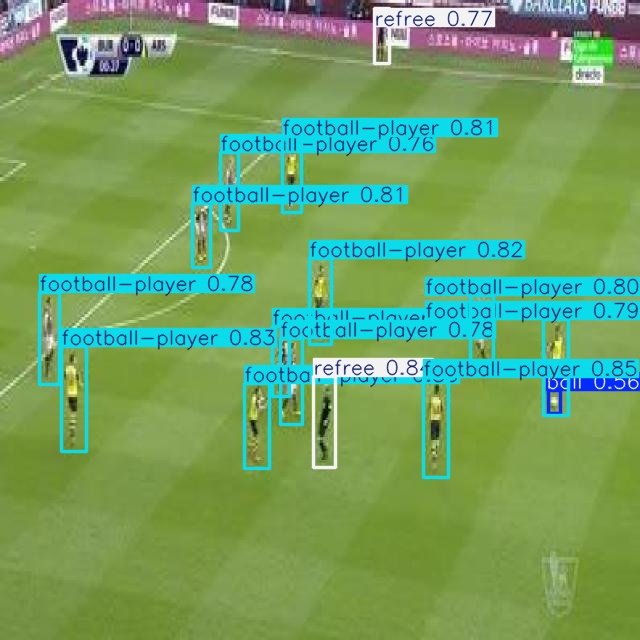

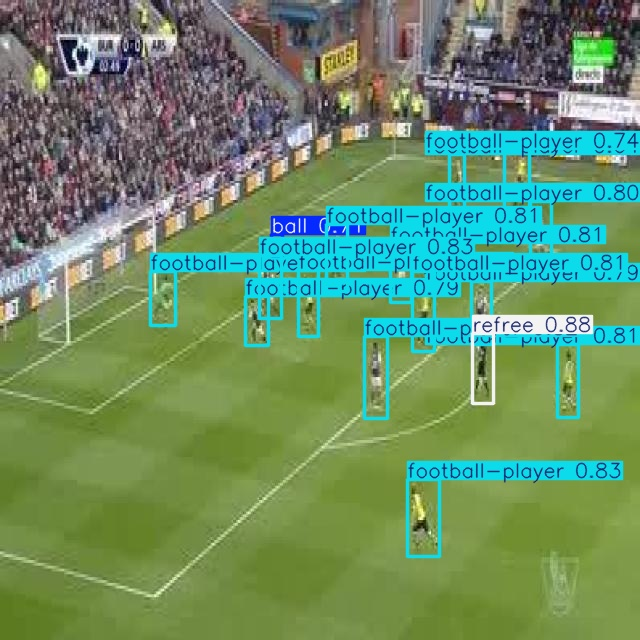

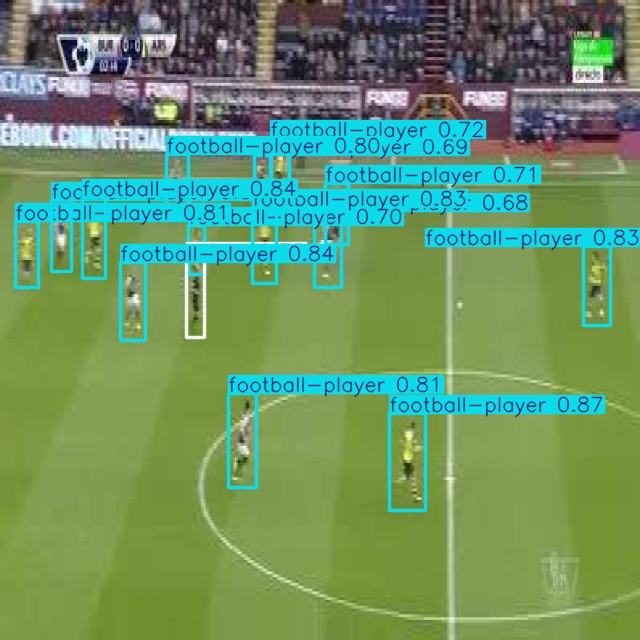

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/videoplayback.mp4

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/3000) /content/videoplayback.mp4: 384x640 1 ball, 17 football-players, 2 refrees, 41.1ms
video 1/1 (frame 2/3000) /content/videoplayback.mp4: 384x640 2 balls, 19 football-players, 1 refree, 10.7ms
video 1/1 (frame 3/3000) /content/videoplayback.mp4: 384x640 1 ball, 18 football-players, 1 refree, 10.7ms
video 1/1 (frame 4/3000) /content/videoplayback.mp4: 384x640 1 ball, 17 football-players, 1 refree, 10.7ms
video 1/1 (frame 5/3000) /content/videoplayback.mp4: 384x640 1 ball, 17 football-players, 1 refree, 10.7ms
video 1/1 (frame 6/3000) /content/videoplayback.mp4: 384x640 1 ball, 16 football-players, 1 refree, 10.7ms
video 1/1 (frame 7/3000) /content/videoplayback.mp4: 384x640 1 ball, 16 football-players, 2 refrees, 10.7ms
video 1/1 (frame 8/3000) /content/videoplayback.mp4: 384x640 2 balls, 16 foo